In [5]:
import pandas as pd

# Load the CSV file for Goal 7 Data
goal7_data = pd.read_csv('Goal7_Transformed.csv')

# Load the Excel file for World Energy Investment Data
energy_investment_data = pd.read_excel('EnergyInvestmentsData.xlsx')


# Load the newly provided Excel file for Electricity Access Data
electricity_access_data = pd.read_excel('ElectricityAccessData.xlsx')

# Display the first few rows and information about the dataset
electricity_access_data_info = electricity_access_data.info()
electricity_access_data_head = electricity_access_data.head()

(electricity_access_data_info, electricity_access_data_head)

# Display the first few rows and information about each dataset
goal7_data_info = goal7_data.info()
goal7_data_head = goal7_data.head()

energy_investment_data_info = energy_investment_data.info()
energy_investment_data_head = energy_investment_data.head()

(goal7_data_info, goal7_data_head, energy_investment_data_info, energy_investment_data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    110 non-null    object 
 1   Access_2000                                109 non-null    float64
 2   Access_2005                                109 non-null    float64
 3   Access_2010                                109 non-null    float64
 4   Access_2015                                110 non-null    float64
 5   Access_2022                                110 non-null    float64
 6   Urban_Access_2022                          110 non-null    float64
 7   Rural_Access_2022                          110 non-null    float64
 8   Population_without_access_2022_in_Million  110 non-null    int64  
 9   Continent                                  110 non-null    object 
 10  Population                

(None,
          Entity_Entity  Access to electricity (% of population)_2000  \
 0          Afghanistan                                      1.613591   
 1              Albania                                    100.000000   
 2              Algeria                                     98.973100   
 3               Angola                                     24.212744   
 4  Antigua and Barbuda                                     97.689260   
 
    Access to electricity (% of population)_2001  \
 0                                      4.074574   
 1                                    100.000000   
 2                                     98.966870   
 3                                     20.000000   
 4                                     97.785255   
 
    Access to electricity (% of population)_2002  \
 0                                      9.409158   
 1                                    100.000000   
 2                                     98.953060   
 3                             

In [6]:
# Check the columns related to 'Access to electricity' to identify the most recent year
access_to_electricity_columns = [col for col in goal7_data.columns if "Access to electricity" in col]
access_to_electricity_columns[-5:]  # Display the last few columns to see the most recent years

['Access to electricity (% of population)_2016',
 'Access to electricity (% of population)_2017',
 'Access to electricity (% of population)_2018',
 'Access to electricity (% of population)_2019',
 'Access to electricity (% of population)_2020']

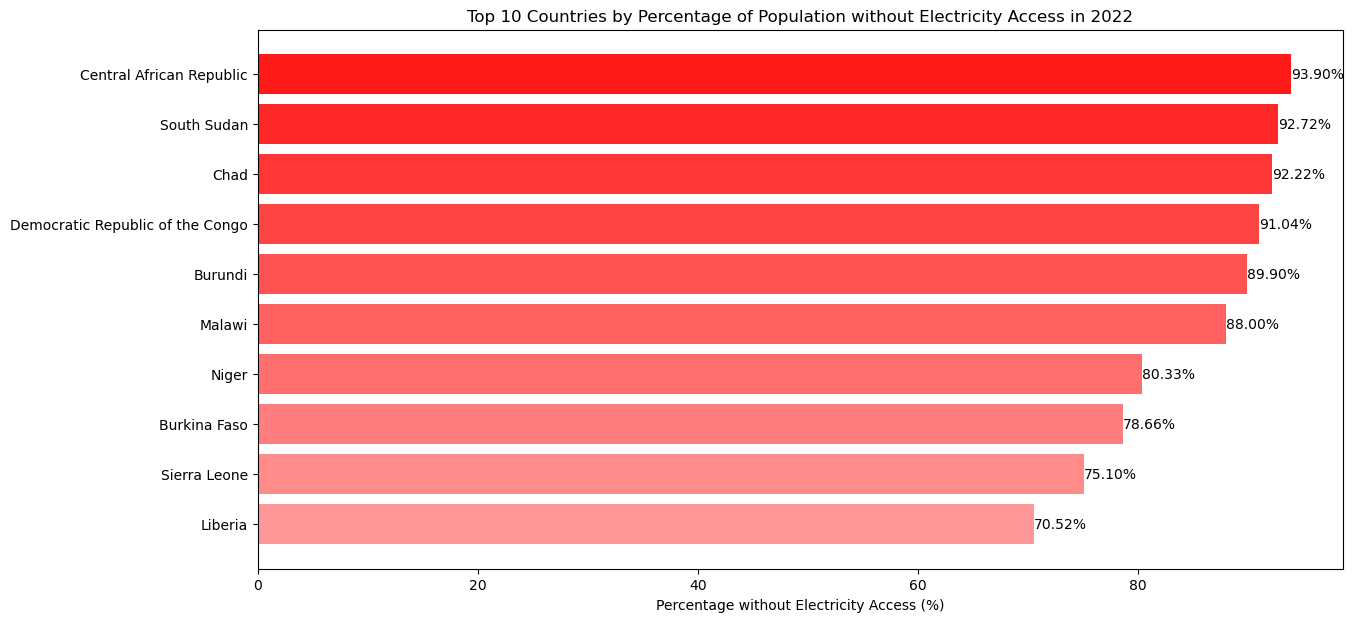

In [23]:
# Sorting the data by the highest percentage of the population without access
electricity_access_data_sorted = electricity_access_data.sort_values('Percent_without_Access', ascending=False)

# Selecting the top 10 countries with the highest percentage of population without access
top_countries_without_access = electricity_access_data_sorted.head(10)

# Generating the color array based on the intensity specified
color_intensity_revised = np.linspace(0.6, 0.1, num=len(top_countries_without_access))
# Correcting the color gradient order (from dark to light for the top to bottom countries)
colors_revised_corrected = colors_revised[::-1]  # Reverse the color array

# Recreating the chart with the correct color gradient
plt.figure(figsize=(14, 7))
bars = plt.barh(top_countries_without_access['Country'], top_countries_without_access['Percent_without_Access'], color=colors_revised_corrected)

# Add the data labels on the bars
for bar in bars:
    plt.text(
        bar.get_width(),       # Position of text
        bar.get_y() + bar.get_height() / 2,  # Y position
        f"{bar.get_width():.2f}%",  # Text with percentage format
        va='center',
        ha='left'
    )

# Setting titles and labels
plt.xlabel('Percentage without Electricity Access (%)')
plt.title('Top 10 Countries by Percentage of Population without Electricity Access in 2022')
plt.gca().invert_yaxis()  # To have the highest percentages at the top of the chart

# Show the plot
plt.show()






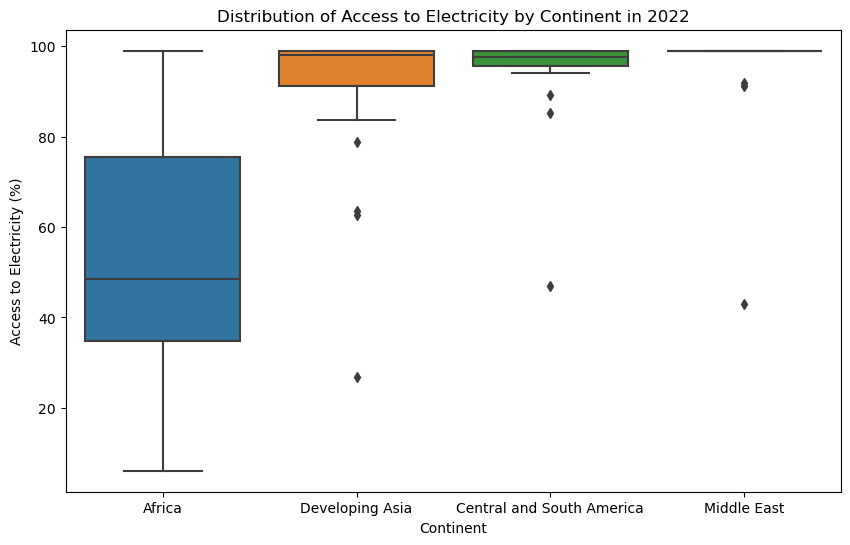

In [25]:


# Boxplot for distribution of access to electricity by continent for the year 2022
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='Access_2022', data=electricity_access_data)
plt.title('Distribution of Access to Electricity by Continent in 2022')
plt.ylabel('Access to Electricity (%)')
plt.xlabel('Continent')
plt.show()

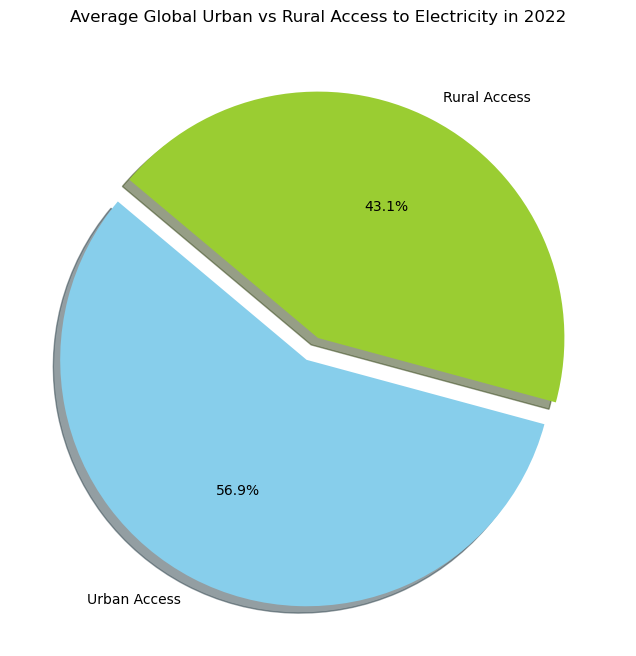

In [26]:
# Pie chart for urban vs rural access to electricity
urban_rural_access = electricity_access_data[['Urban_Access_2022', 'Rural_Access_2022']].mean()

# Define pie chart data
pie_labels = 'Urban Access', 'Rural Access'
pie_sizes = [urban_rural_access['Urban_Access_2022'], urban_rural_access['Rural_Access_2022']]
pie_colors = ['skyblue', 'yellowgreen']
pie_explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Urban Access')

# Plot
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, explode=pie_explode, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Average Global Urban vs Rural Access to Electricity in 2022')
plt.show()


C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


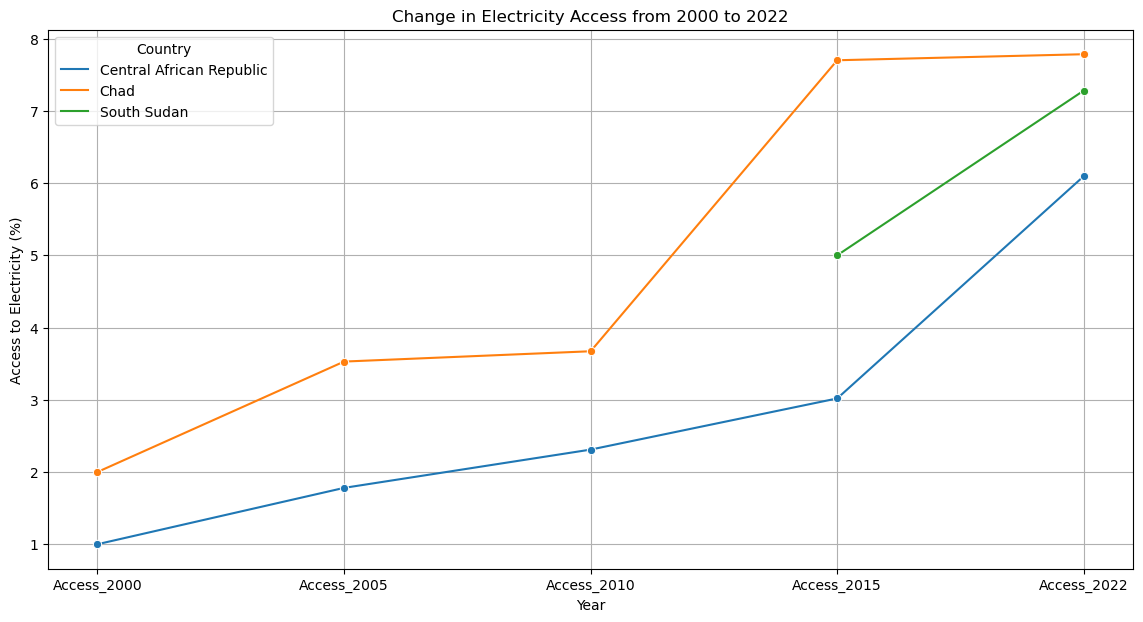

In [29]:
# Select a few countries for time series visualization
selected_countries = ['Central African Republic', 'South Sudan', 'Chad', 'Norway', 'Germany', 'Australia']  # Example countries
time_series_data = electricity_access_data[electricity_access_data['Country'].isin(selected_countries)]

# Reshaping the dataframe for plotting
time_series_melted = pd.melt(time_series_data, id_vars=['Country'], value_vars=years, var_name='Year', value_name='Access')

# Plotting the time series
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Access', hue='Country', data=time_series_melted, marker='o')

plt.title('Change in Electricity Access from 2000 to 2022')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.show()


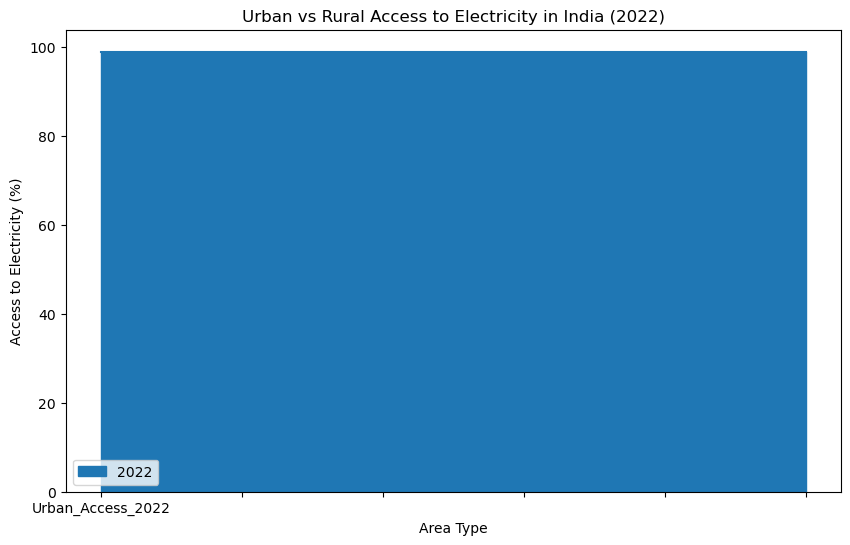

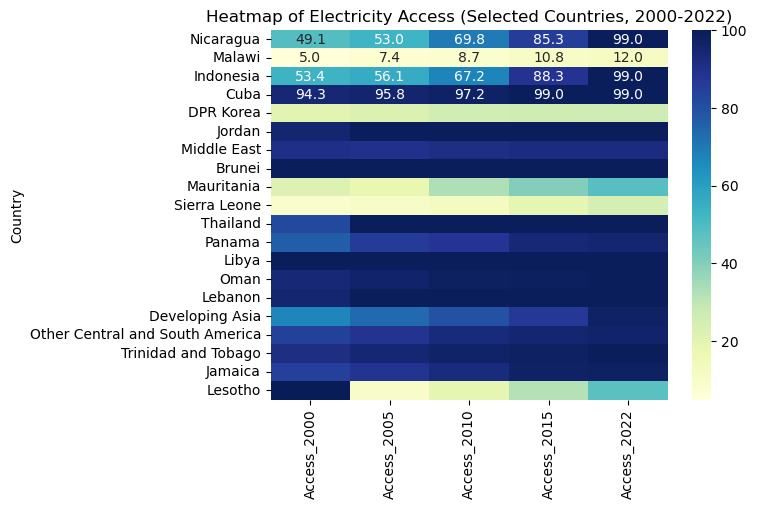

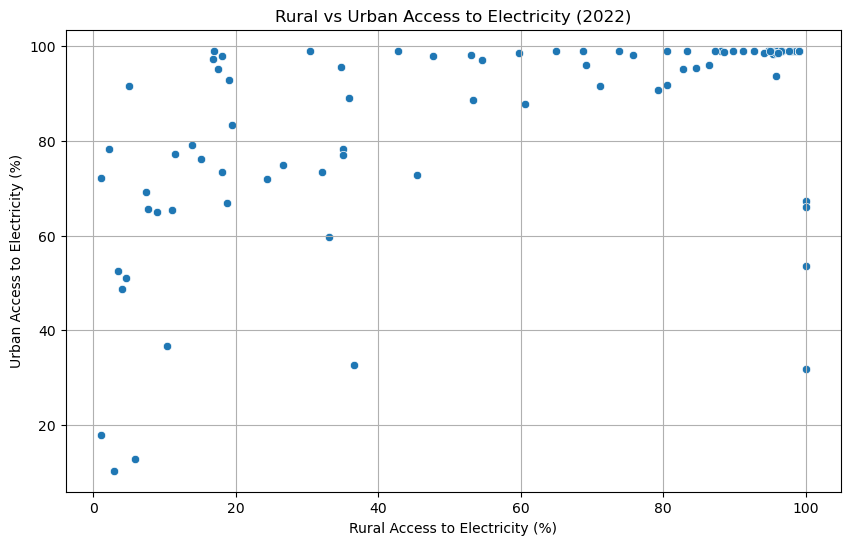

C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


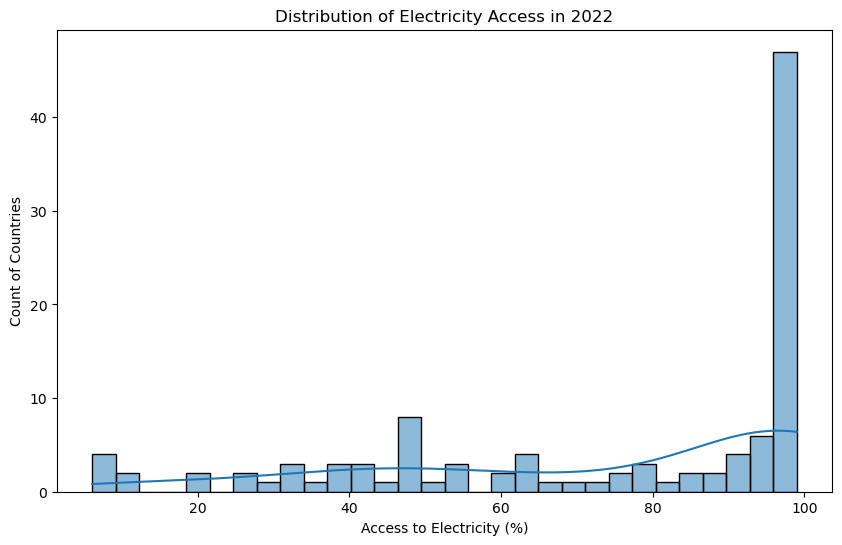

In [30]:
# 1. Stacked Area Chart for Urban vs Rural Access over time for a selected country (example: India)
# Filtering the data for a specific country
country_data = electricity_access_data[electricity_access_data['Country'] == 'India']

# Preparing the data for the stacked area chart
area_chart_data = country_data[['Urban_Access_2022', 'Rural_Access_2022']].T
area_chart_data.columns = ['2022']  # Since we have only one year, we rename the columns to years

# Plotting the stacked area chart
area_chart_data.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Urban vs Rural Access to Electricity in India (2022)')
plt.ylabel('Access to Electricity (%)')
plt.xlabel('Area Type')
plt.xticks(rotation=0)
plt.show()

# 2. Heatmap for access to electricity across countries and over years
# Since the dataset is quite large, we'll only take a sample of countries for readability
heatmap_data = electricity_access_data.sample(20, random_state=1)[['Country'] + years].set_index('Country')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Electricity Access (Selected Countries, 2000-2022)')
plt.show()

# 3. Scatter Plot to compare Urban vs Rural Access in 2022 for all countries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rural_Access_2022', y='Urban_Access_2022', data=electricity_access_data)
plt.title('Rural vs Urban Access to Electricity (2022)')
plt.xlabel('Rural Access to Electricity (%)')
plt.ylabel('Urban Access to Electricity (%)')
plt.grid(True)
plt.show()

# 4. Histogram to visualize the distribution of access to electricity among all countries in 2022
plt.figure(figsize=(10, 6))
sns.histplot(electricity_access_data['Access_2022'], bins=30, kde=True)
plt.title('Distribution of Electricity Access in 2022')
plt.xlabel('Access to Electricity (%)')
plt.ylabel('Count of Countries')
plt.show()


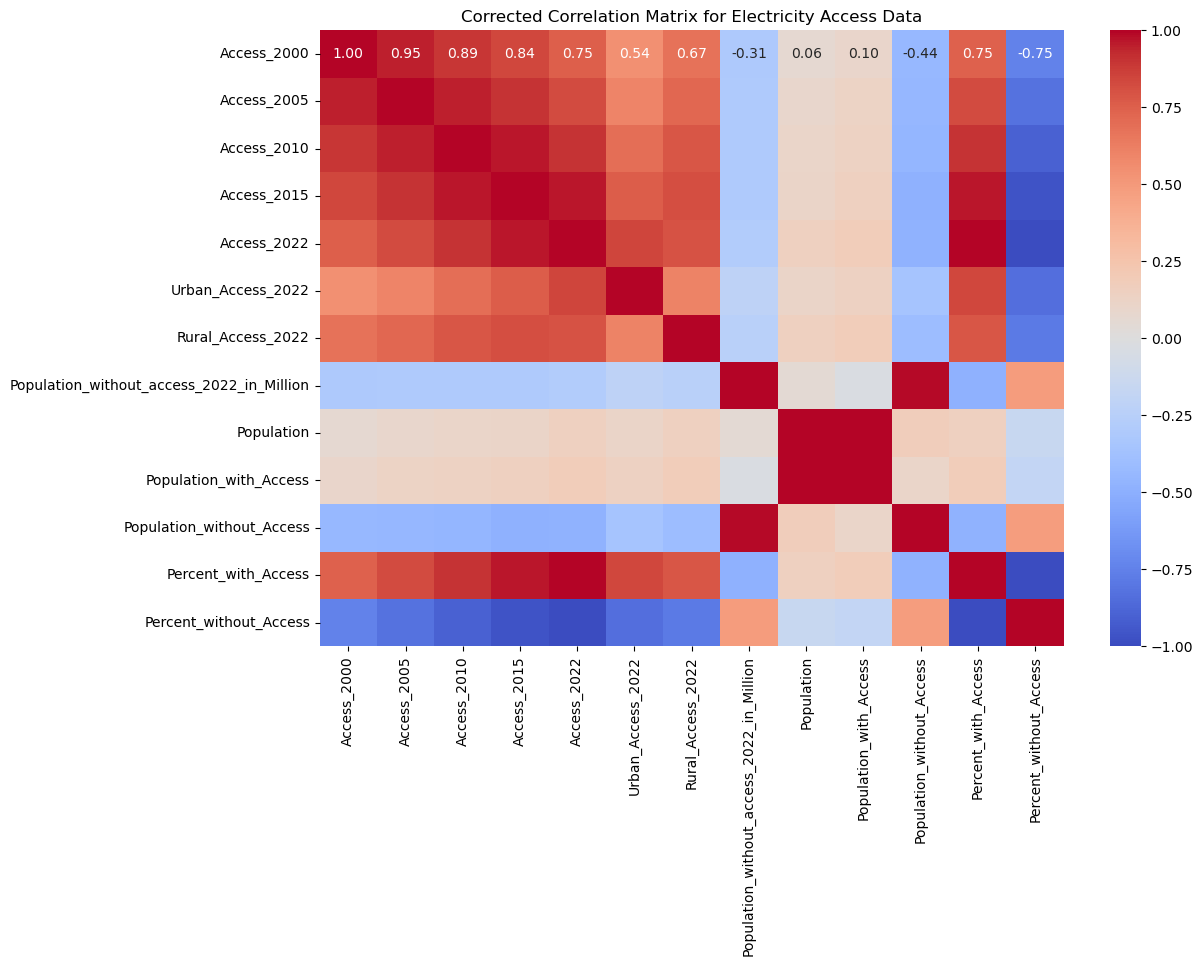

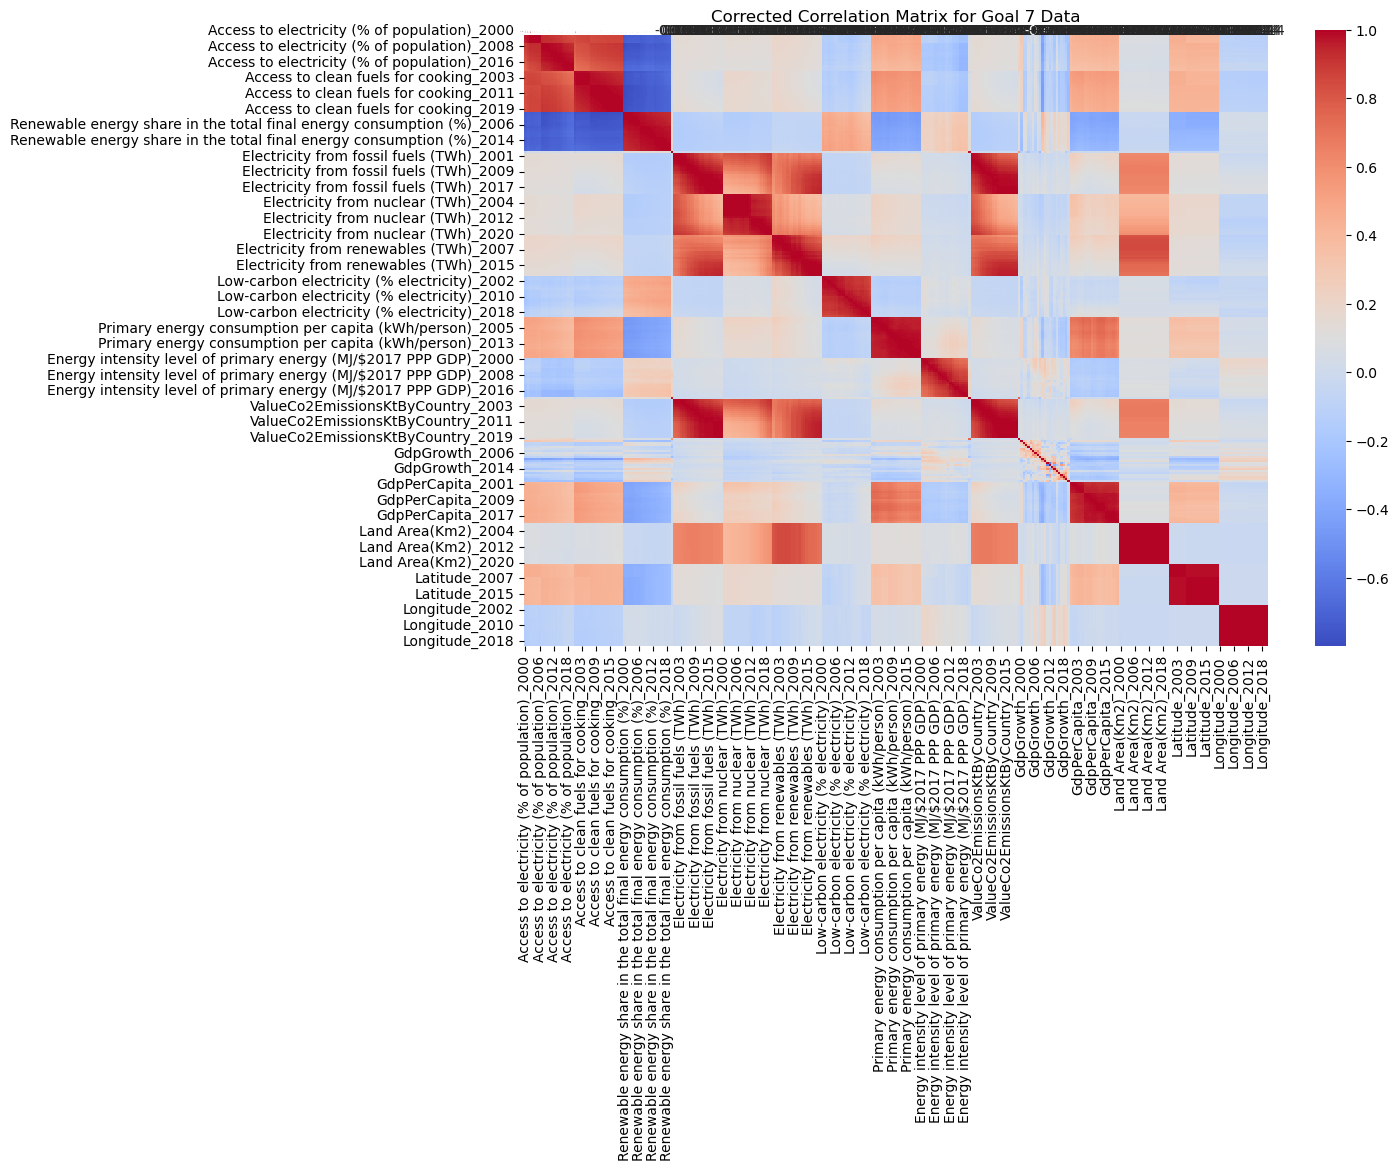

In [28]:
# Exclude non-numeric columns for correlation analysis
numeric_columns_electricity_access = electricity_access_data.select_dtypes(include=['number']).columns
numeric_columns_goal7 = goal7_data.select_dtypes(include=['number']).columns

# Recalculate the correlation matrices excluding non-numeric data
corr_matrix_electricity_access_fixed = electricity_access_data[numeric_columns_electricity_access].corr()
corr_matrix_goal7_fixed = goal7_data[numeric_columns_goal7].corr()

# Plot the fixed correlation matrix for Electricity Access Data
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_electricity_access_fixed, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrected Correlation Matrix for Electricity Access Data")
plt.show()

# Plot the fixed correlation matrix for Goal 7 Data
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_goal7_fixed, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrected Correlation Matrix for Goal 7 Data")
plt.show()


In [37]:
import pandas as pd

# Load the data from the uploaded CSV file
data_file_path = 'Goal7_Transformed.csv'
electricity_access_data = pd.read_csv(data_file_path)

# Display the first few rows of the dataframe to understand its structure
electricity_access_data.head()

# Extracting the latest year available for the electricity access data from column names
years = [int(col.split('_')[-1]) for col in electricity_access_data.columns if 'Access to electricity' in col]
latest_year = max(years)

# Extract the columns for the latest year
latest_year_access_column = f'Access to electricity (% of population)_{latest_year}'
latest_year_latitude_column = f'Latitude_{latest_year}'
latest_year_longitude_column = f'Longitude_{latest_year}'

# Prepare the data for mapping
map_data = electricity_access_data[[latest_year_access_column, latest_year_latitude_column, latest_year_longitude_column]].copy()
map_data.columns = ['Access', 'Latitude', 'Longitude']

# Displaying the year and first few rows of the prepared data for mapping
latest_year, map_data.head()


(2020,
       Access   Latitude  Longitude
 0   97.70000  33.939110  67.709953
 1  100.00000  41.153332  20.168331
 2   99.80413  28.033886   1.659626
 3   46.89061 -11.202692  17.873887
 4  100.00000  17.060816 -61.796428)

C:\Users\chand\AppData\Local\Temp\ipykernel_4496\2794206736.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


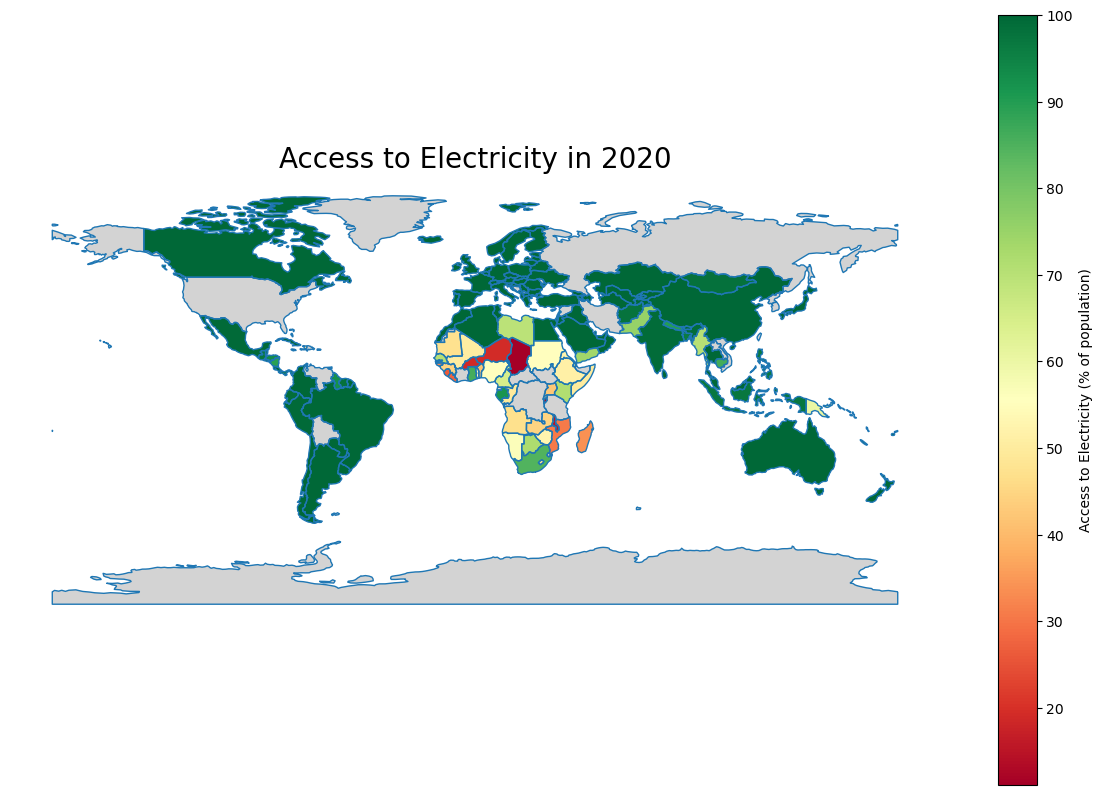

In [46]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data_file_path = 'Goal7_Transformed.csv'  # Update with your local path
electricity_access_data = pd.read_csv(data_file_path)
latest_year = 2020  # Assuming 2020 is the latest year in your dataset

# Extract necessary columns
latest_year_access_column = f'Access to electricity (% of population)_{latest_year}'
latest_year_latitude_column = f'Latitude_{latest_year}'
latest_year_longitude_column = f'Longitude_{latest_year}'
map_data = electricity_access_data[['Entity_Entity', latest_year_access_column]].copy()
map_data.columns = ['Country', 'Access']

# Load world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world data with electricity access data
world = world.merge(map_data, how='left', left_on='name', right_on='Country')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Access', ax=ax, legend=True, cmap='RdYlGn', legend_kwds={'label': "Access to Electricity (% of population)", 'orientation': "vertical"},
           missing_kwds={"color": "lightgray"})  # using RdYlGn color map for intuitive color coding

ax.set_title('Access to Electricity in 2020', fontsize=20)
ax.set_axis_off()
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_4496\3100187974.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


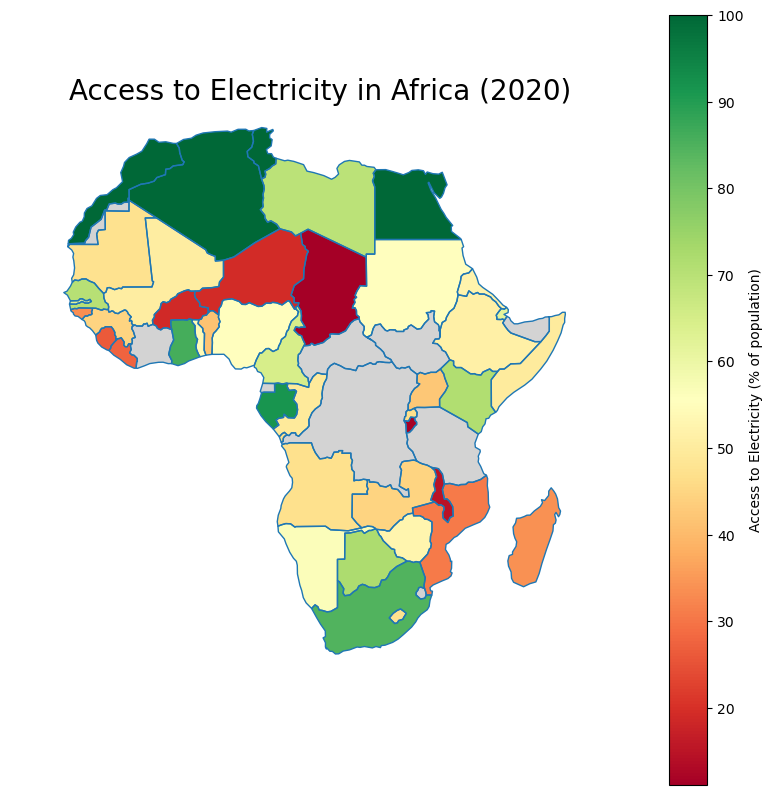

In [47]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data_file_path = 'Goal7_Transformed.csv'  # Update with your local path
electricity_access_data = pd.read_csv(data_file_path)
latest_year = 2020  # Assuming 2020 is the latest year in your dataset

# Extract necessary columns
latest_year_access_column = f'Access to electricity (% of population)_{latest_year}'
map_data = electricity_access_data[['Entity_Entity', latest_year_access_column]].copy()
map_data.columns = ['Country', 'Access']

# Load world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for only African countries
africa = world[world['continent'] == 'Africa']

# Merge African data with electricity access data
africa = africa.merge(map_data, how='left', left_on='name', right_on='Country')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
africa.boundary.plot(ax=ax, linewidth=1)
africa.plot(column='Access', ax=ax, legend=True, cmap='RdYlGn', legend_kwds={'label': "Access to Electricity (% of population)", 'orientation': "vertical"},
           missing_kwds={"color": "lightgray"})  # using RdYlGn color map for intuitive color coding

ax.set_title('Access to Electricity in Africa (2020)', fontsize=20)
ax.set_xlim([-25, 60])  # Adjust these values based on the extent you want to cover
ax.set_ylim([-40, 40])  # Adjust these values based on the extent you want to cover
ax.set_axis_off()
plt.show()


C:\Users\chand\AppData\Local\Temp\ipykernel_4496\1943133622.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


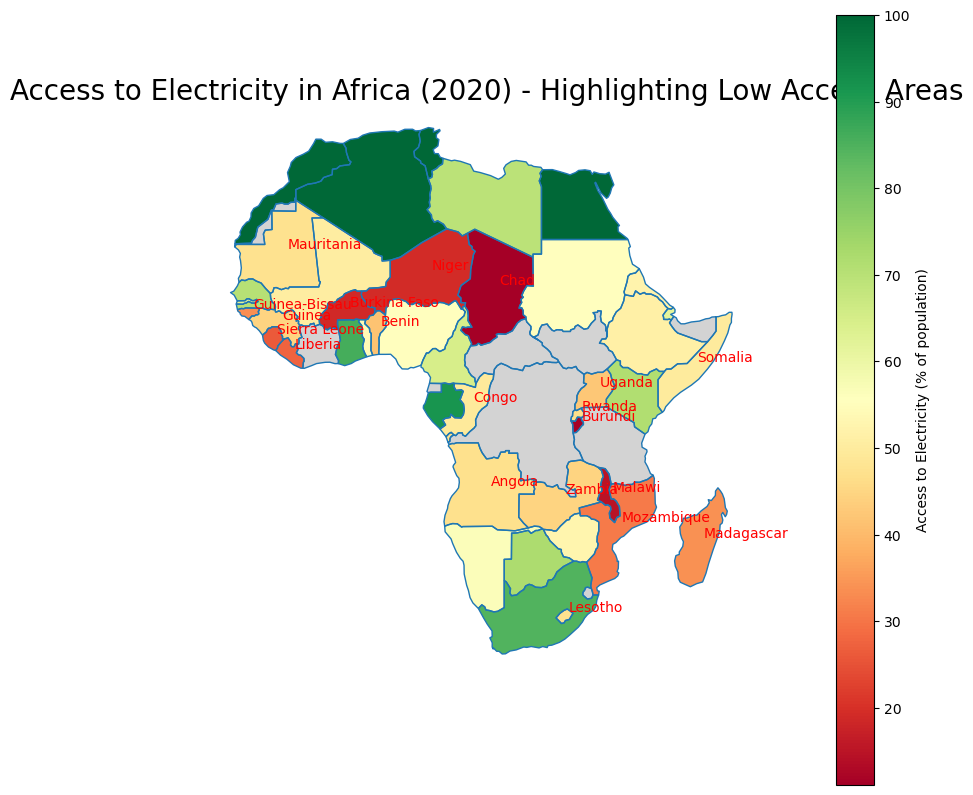

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data_file_path = 'Goal7_Transformed.csv'  # Update with your local path
electricity_access_data = pd.read_csv(data_file_path)
latest_year = 2020  # Assuming 2020 is the latest year in your dataset

# Extract necessary columns
latest_year_access_column = f'Access to electricity (% of population)_{latest_year}'
map_data = electricity_access_data[['Entity_Entity', latest_year_access_column]].copy()
map_data.columns = ['Country', 'Access']

# Load world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for only African countries
africa = world[world['continent'] == 'Africa']

# Merge African data with electricity access data
africa = africa.merge(map_data, how='left', left_on='name', right_on='Country')

# Define low access threshold
low_access_threshold = 50  # less than 50% access to electricity

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
africa.boundary.plot(ax=ax, linewidth=1)
africa.plot(column='Access', ax=ax, legend=True, cmap='RdYlGn', legend_kwds={'label': "Access to Electricity (% of population)", 'orientation': "vertical"},
           missing_kwds={"color": "lightgray"})  # using RdYlGn color map for intuitive color coding

# Label countries with low access
for idx, row in africa.iterrows():
    if pd.notna(row['Access']) and row['Access'] < low_access_threshold:
        plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     xytext=(3, 3), textcoords="offset points", color='red')

ax.set_title('Access to Electricity in Africa (2020) - Highlighting Low Access Areas', fontsize=20)
ax.set_xlim([-25, 60])  # Adjust these values based on the extent you want to cover
ax.set_ylim([-40, 40])  # Adjust these values based on the extent you want to cover
ax.set_axis_off()
plt.show()


In [40]:
import folium
from folium.plugins import HeatMap

# Create a base map
map = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodbpositron')

# Create a gradient for Heatmap: more access in green, less in red
gradient = {
    0.0: 'red', 
    0.5: 'orange', 
    1.0: 'green'
}

# Add a heatmap layer to the map
HeatMap(
    data=map_data[['Latitude', 'Longitude', 'Access']].dropna().values, 
    min_opacity=0.3,
    max_val=100,
    radius=15, 
    blur=15, 
    gradient=gradient
).add_to(map)

# Display the map
map


C:\Users\chand\AppData\Local\Temp\ipykernel_4496\4240764167.py:15: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
electricity_access_data = pd.read_excel('ElectricityAccessData.xlsx')

# Ensure you're only working with numeric data for median calculation
numeric_cols = electricity_access_data.select_dtypes(include=['number'])
electricity_access_data_filled = electricity_access_data.fillna(numeric_cols.median())

# If you have specific categorical columns, fill them with the mode or a specific value:
# For example, to fill categorical data:
# electricity_access_data['Your_Categorical_Column'] = electricity_access_data['Your_Categorical_Column'].fillna(electricity_access_data['Your_Categorical_Column'].mode()[0])

# Select features and the target variable
# Note: Adjust the column names if different
features = electricity_access_data_filled.select_dtypes(include=['number']).drop('Percent_with_Access', axis=1)
target = electricity_access_data_filled['Percent_with_Access']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Optionally, you can also display feature importances
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
print("Feature importances:\n", feature_importances.sort_values(ascending=False))


Mean Squared Error: 1.1874492821591074
Feature importances:
 Percent_without_Access                       0.858594
Access_2022                                  0.121359
Access_2015                                  0.009376
Urban_Access_2022                            0.004163
Access_2010                                  0.001761
Access_2005                                  0.001301
Rural_Access_2022                            0.001066
Population_without_Access                    0.000777
Access_2000                                  0.000554
Population_with_Access                       0.000528
Population                                   0.000341
Population_without_access_2022_in_Million    0.000181
dtype: float64


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('Goal7_Transformed.csv')

# Check for columns related to coal and fuel access
print(data.columns)

# Prepare data (fill missing values, select and transform features)
data_filled = data.fillna(data.median())  # Adjust as needed

# Calculate and plot correlation matrix
corr_matrix = data_filled.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Build and evaluate the model
features = data_filled[['coal_access', 'fuel_access', 'other_relevant_features']]
target = data_filled['electricity_access']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Feature importances
importances = model.feature_importances_
print(importances)


Index(['Entity_Entity', 'Access to electricity (% of population)_2000',
       'Access to electricity (% of population)_2001',
       'Access to electricity (% of population)_2002',
       'Access to electricity (% of population)_2003',
       'Access to electricity (% of population)_2004',
       'Access to electricity (% of population)_2005',
       'Access to electricity (% of population)_2006',
       'Access to electricity (% of population)_2007',
       'Access to electricity (% of population)_2008',
       ...
       'Longitude_2011', 'Longitude_2012', 'Longitude_2013', 'Longitude_2014',
       'Longitude_2015', 'Longitude_2016', 'Longitude_2017', 'Longitude_2018',
       'Longitude_2019', 'Longitude_2020'],
      dtype='object', length=337)


TypeError: Cannot convert [['Afghanistan' 'Albania' 'Algeria' ... 'Yemen' 'Zambia' 'Zimbabwe']
 ['60' '105' '18' ... '56' '25' '38']
 ['60' '105' '18' ... '56' '25' '38']
 ...
 ['60' '105' '18' ... '56' '25' '38']
 ['60' '105' '18' ... '56' '25' '38']
 ['60' '105' '18' ... '56' '25' '38']] to numeric